# Bank Customer Churn
The aim is to predect chrun customers of bank using machine learning.


In [1]:
#Imporing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv
data=pd.read_csv("Churn_Modelling.csv")
#Checking shape of data
print("shape of data: ",data.shape)

shape of data:  (10000, 14)


### EDA and data visualization 

In [3]:
#Checking Data
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#checking duplicated
len(data[data.duplicated()])

0

In [5]:
# Drop unnecessary columns
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [6]:
#checking null values
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Checking Stastics of data.
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
len(data[data.duplicated()])

0

<AxesSubplot:xlabel='Age', ylabel='Count'>

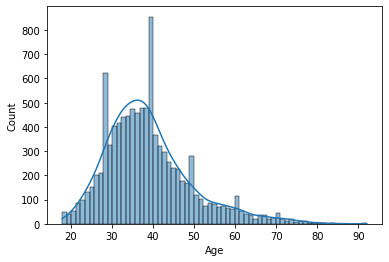

In [10]:
sns.histplot(data.Age, kde=True)

<AxesSubplot:xlabel='Balance', ylabel='Count'>

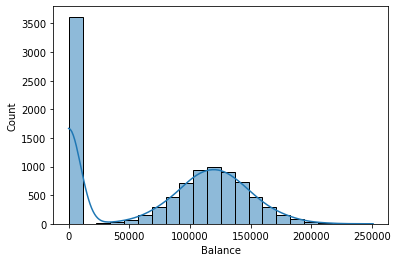

In [11]:
sns.histplot(data.Balance, kde=True)

<AxesSubplot:ylabel='Gender'>

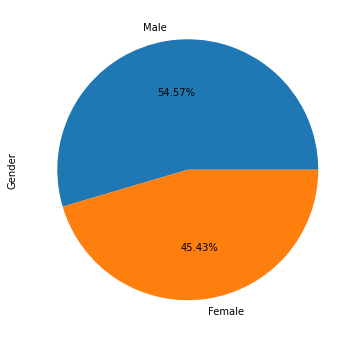

In [12]:
data.Gender.value_counts().plot(kind="pie",figsize=(6,6), autopct="%1.2f%%")

C:\Users\Vaibhav\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Geography', ylabel='count'>

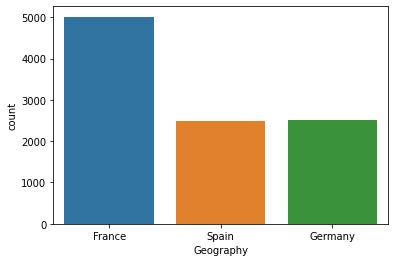

In [13]:
sns.countplot(data.Geography)

C:\Users\Vaibhav\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

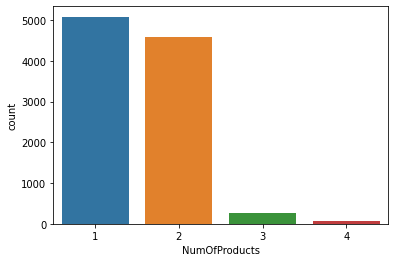

In [14]:
sns.countplot(data.NumOfProducts)

<AxesSubplot:ylabel='Exited'>

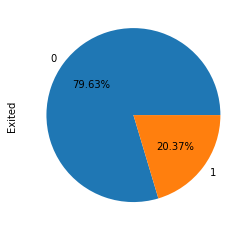

In [15]:
#Chaking if dataset is imbalace or not
data.Exited.value_counts().plot(kind="pie", autopct="%1.2f%%")

####  Insides
Data contains of 10000 records.
There is no null values and duplicate in the dataset
Most of the customers are from France
Most of the customers are of age between 30 to 40 but have right skrewness.
Mant customers have 0 balance in their account.
Most of the customers have 1 product
There are 45.43% females and 54.57% males.
The dataset is imbalance.

### Data Pre Processing

In [16]:
# One-hot encoding for 'Geography' and 'Gender'
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

# Separate features (X) and target (y)
X = data.drop(columns=['Exited'])
y = data['Exited']


In [17]:
#test train split stratify because data is imbalanced.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Creating  Model and Evaluation

In [18]:
# Create and train the Random Forest classifier
rf_classifier= RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=50,
                       random_state=42)
rf_classifier.fit(X, y)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=50,
                       random_state=42)

In [19]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: ",accuracy*100,"%")
print(f"Precision: ",precision)
print(f"Recall: ",recall)
print(f"F1 Score: ", f1)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy:  97.36666666666667 %
Precision:  0.9871794871794872
Recall:  0.8821603927986906
F1 Score:  0.9317199654278305
ROC-AUC Score: 0.94


[[2382    7]
 [  72  539]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2389
           1       0.99      0.88      0.93       611

    accuracy                           0.97      3000
   macro avg       0.98      0.94      0.96      3000
weighted avg       0.97      0.97      0.97      3000



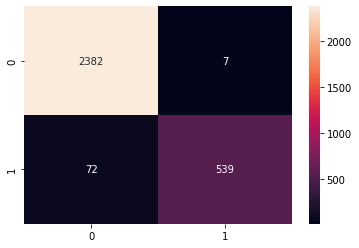

In [21]:
#Plotting confussion matrix and classification reprt
cm=confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='.5g')
print(classification_report(y_test, y_pred))
